In [1]:
import os
from glob import glob

import numpy as np
import utils

from matplotlib import pyplot as plt

COLORS = utils.pascal_color_map()[1:]

Converting 5000 RGB samples to LAB color space...
Conversion to LAB complete.
Fitting KMeans with 128 clusters on 5000 samples...
KMeans fitting complete.


1. Load the data

In [2]:
# Preapre the data path
DATA_DIR = "/fsx-onevision/tym/sam3_and_data/data"
ANNOT_DIR = os.path.join(DATA_DIR, "annotation")

annot_file_list = glob(os.path.join(ANNOT_DIR, "*.json"))
annot_dfs = utils.get_annot_dfs(file_list=annot_file_list)

100%|██████████| 7/7 [00:03<00:00,  1.92it/s]


2. Examples of the data format

In [3]:
annot_dfs["saco_veval_sav_test"].keys()

dict_keys(['info', 'videos', 'annotations', 'categories', 'video_np_pairs'])

In [4]:
annot_dfs["saco_veval_sav_test"]["info"]

{'version': 'v1', 'date': '2025-09-24', 'description': 'SA-Co/VEval SA-V Test'}

In [5]:
annot_dfs["saco_veval_sav_test"]["videos"].head(3)

,id,video_name,file_names,height,width,length
0,0,sav_000208,"[sav_000208/00000.jpg, sav_000208/00004.jpg, s...",1280,720,146
1,1,sav_000425,"[sav_000425/00000.jpg, sav_000425/00004.jpg, s...",864,480,120
2,2,sav_000818,"[sav_000818/00000.jpg, sav_000818/00004.jpg, s...",864,480,117


In [6]:
annot_dfs["saco_veval_sav_test"]["annotations"].head(3)

,id,segmentations,bboxes,areas,iscrowd,video_id,height,width,category_id,noun_phrase
0,0,[{'counts': '`^`>b0[o04M4M10O100O100O1O2O0O101...,"[[464.0, 458.0, 18.0, 27.0], [466.0, 456.0, 20...","[384.0, 407.0, 392.0, 372.0, 384.0, 347.0, 388...",0,111,1024,576,49566,a gold watch
1,1,[{'counts': 'PRm1261mi0<H7M201O0000001O0000000...,"[[73.0, 614.0, 105.0, 38.0], [73.0, 614.0, 105...","[2608.0, 2679.0, 2704.0, 2728.0, 2715.0, 2698....",0,22,848,480,576,a tablet
2,2,[{'counts': 'oYP_11fQ12ZSO9Wg0JaXOg0Tg0\OnUOJg...,"[[1426.0, 317.0, 141.0, 209.0], [1432.0, 313.0...","[25950.0, 25876.0, 25880.0, 25880.0, 26040.0, ...",0,23,1080,1920,50891,a black and white camouflage tank top


In [7]:
annot_dfs["saco_veval_sav_test"]["categories"].head(3)

,id,name
0,1,a monkey
1,2,a horse
2,3,a fan


In [8]:
annot_dfs["saco_veval_sav_test"]["video_np_pairs"].head(3)

,id,video_id,category_id,noun_phrase,num_masklets
0,0,35,50912,an image of bottle,0
1,1,28,15691,the computer,0
2,2,66,48608,a gas station,0


3. Visualization examples

In [9]:
def get_a_non_none_seg(df):
    for i in range(len(df)):
        seg = df['segmentations'].iloc[i]
        if seg[0] is not None:
            return i
    raise ValueError("No non-none segmentation found")

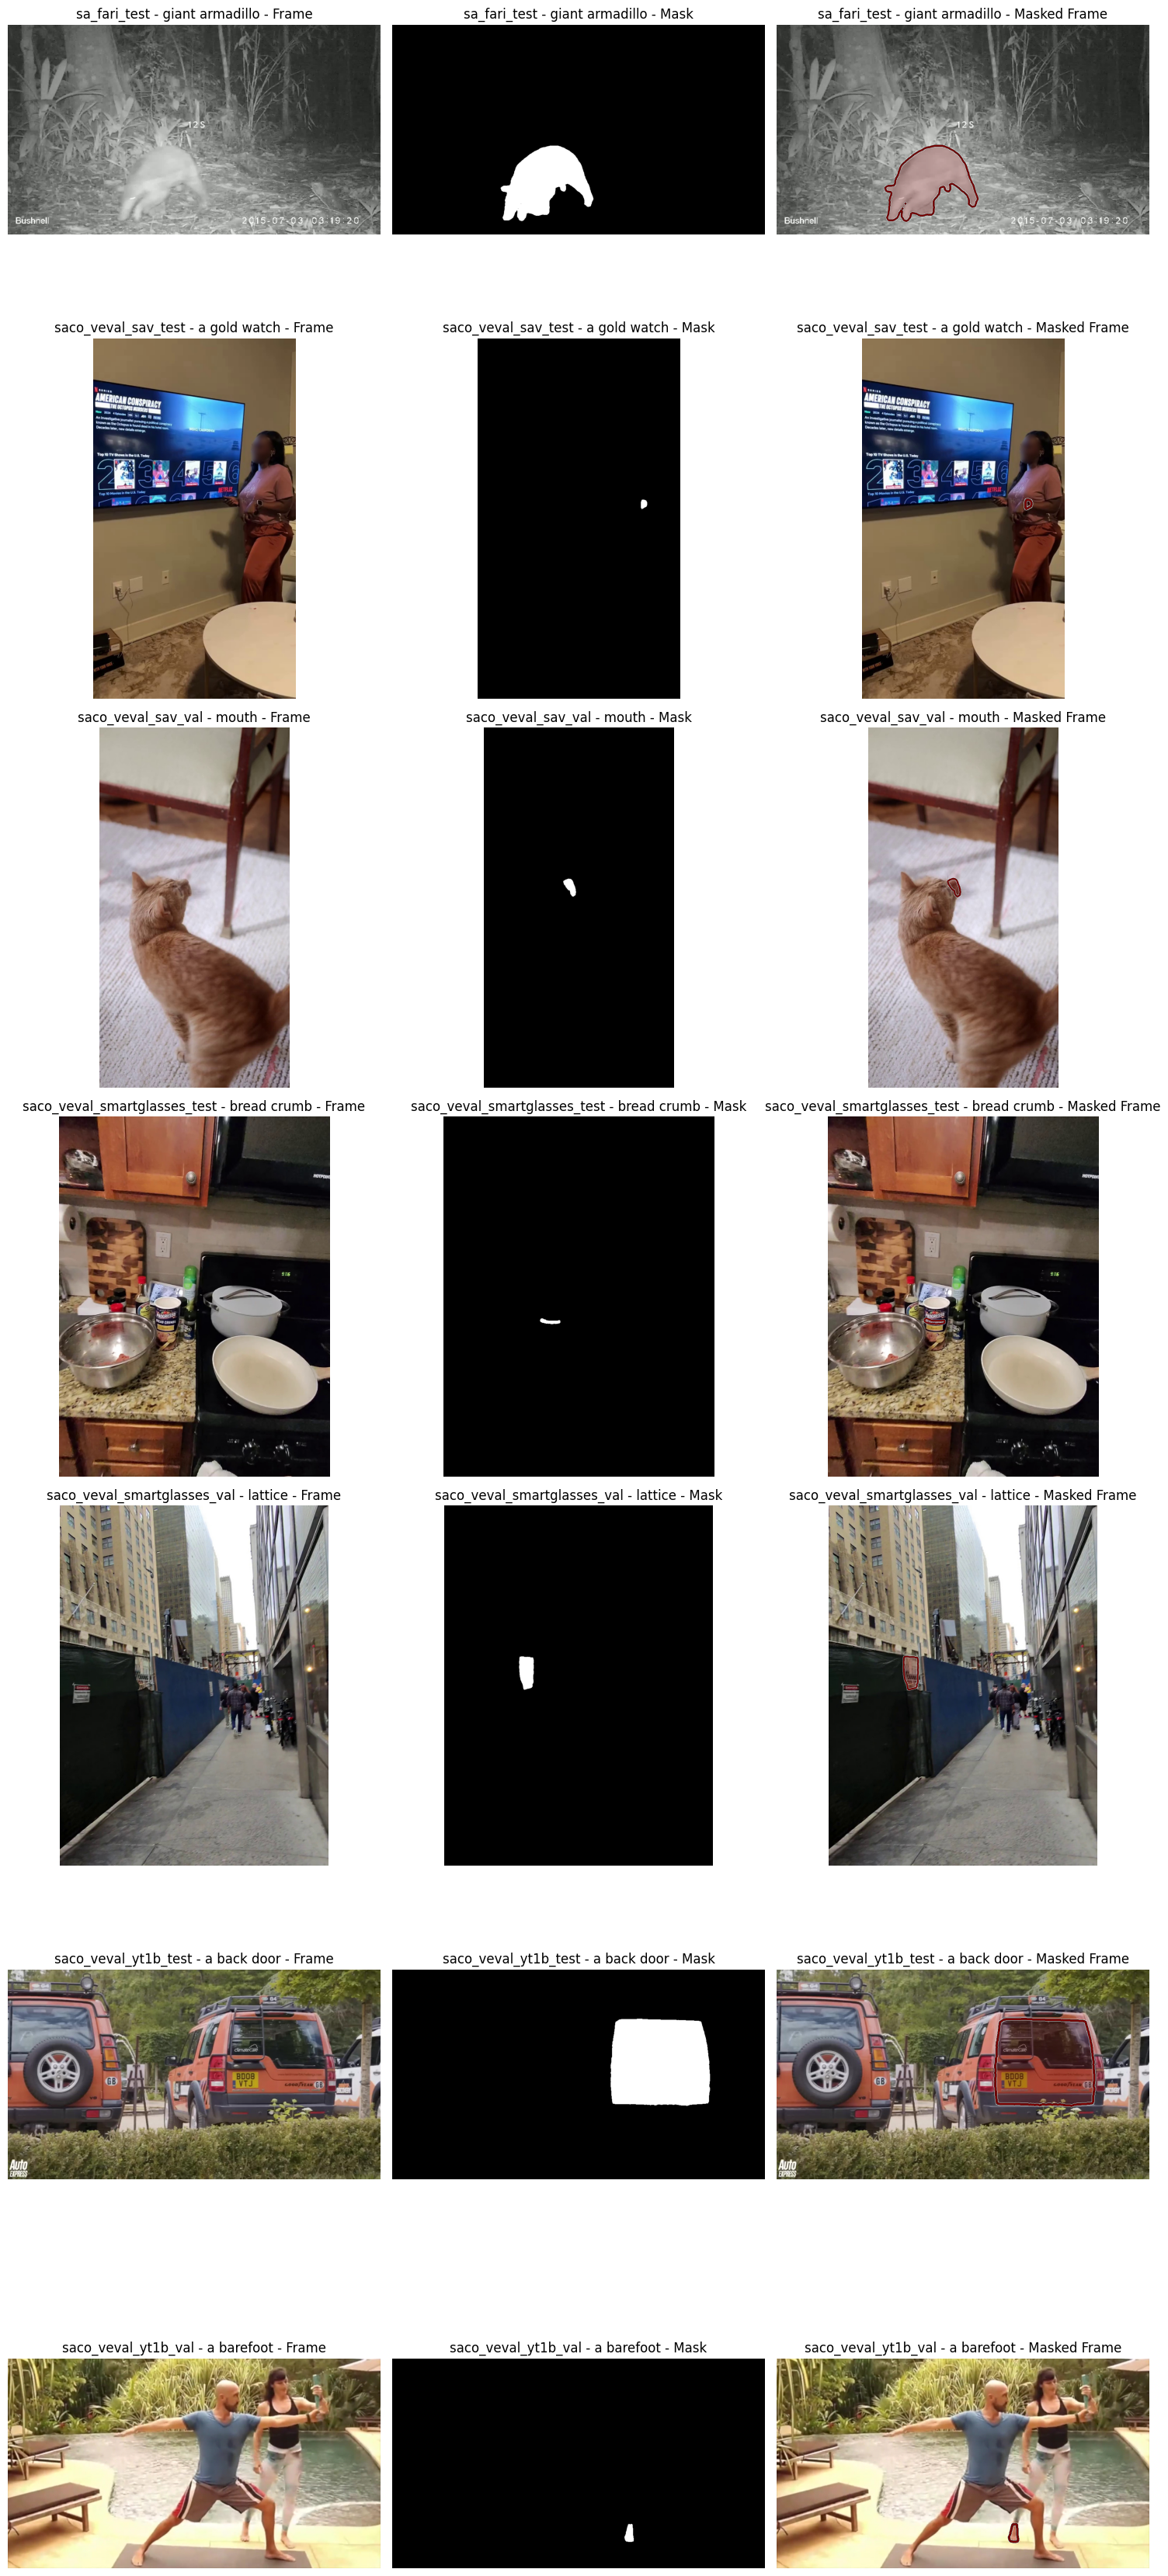

In [10]:
datasets = sorted(list(annot_dfs.keys()))
num_datasets = len(datasets)

fig, axes = plt.subplots(num_datasets, 3, figsize=(15, 5 * num_datasets))

for i, dataset in enumerate(datasets):
    annot_df = annot_dfs[dataset]["annotations"]
    a_non_none_seg_row_num = get_a_non_none_seg(annot_df)

    frame, mask, noun_phrase = utils.get_vis_example(
        annot_dfs=annot_dfs,
        dataset=dataset,
        row_num=a_non_none_seg_row_num,
        frame_num=0,
        data_dir=DATA_DIR,
    )

    masks = np.array([mask])
    masked_frame = utils.draw_masks_to_frame(
        frame=frame, masks=masks, colors=COLORS[: len(masks)]
    )

    # Column 1: Original frame
    axes[i, 0].imshow(frame)
    axes[i, 0].set_title(f"{dataset} - {noun_phrase} - Frame")
    axes[i, 0].axis('off')
    
    # Column 2: Mask in black and white
    axes[i, 1].imshow(mask, cmap='gray')
    axes[i, 1].set_title(f"{dataset} - {noun_phrase} - Mask")
    axes[i, 1].axis('off')
    
    # Column 3: Masked frame
    axes[i, 2].imshow(masked_frame)
    axes[i, 2].set_title(f"{dataset} - {noun_phrase} - Masked Frame")
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()

